# Лабораторна робота №5

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

## Завдання

1. Завантажте набір даних по медичному страхуванню за [посиланням](\"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
2. За рахунок зміни гіперпараметрів нейронної мережі спробуйте досягнути найменшого значення функції втрат (mae).
3. Підготувати необхідні файли для захисту , за прикладом попередньої лабораторної роботи, але не викладати їх в репозиторій github до моменту захисту лабораторної роботи.
4. Викласти результати в репозиторій під час захисту лабораторної роботи.

ORIGINAL DATASET: 
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

CONVERTED DATASET: 
   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0           

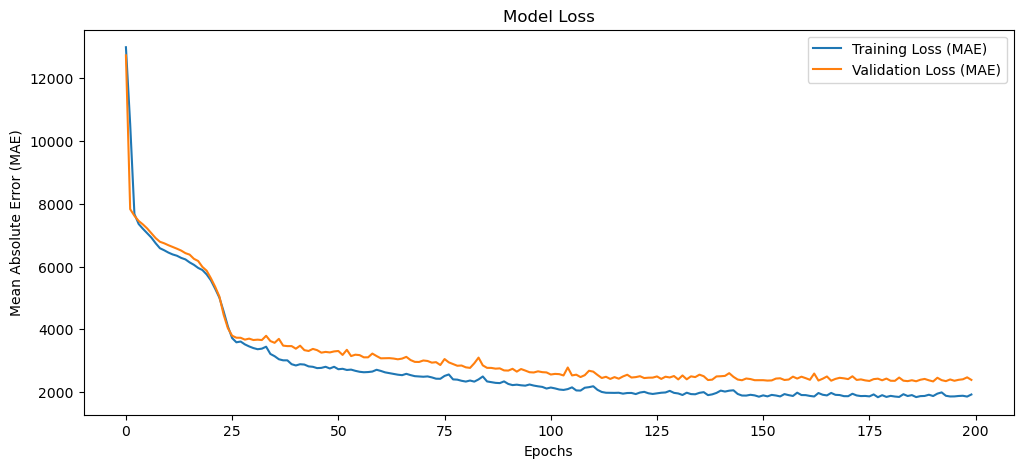

9/9 [==============================] - 0s 6ms/step


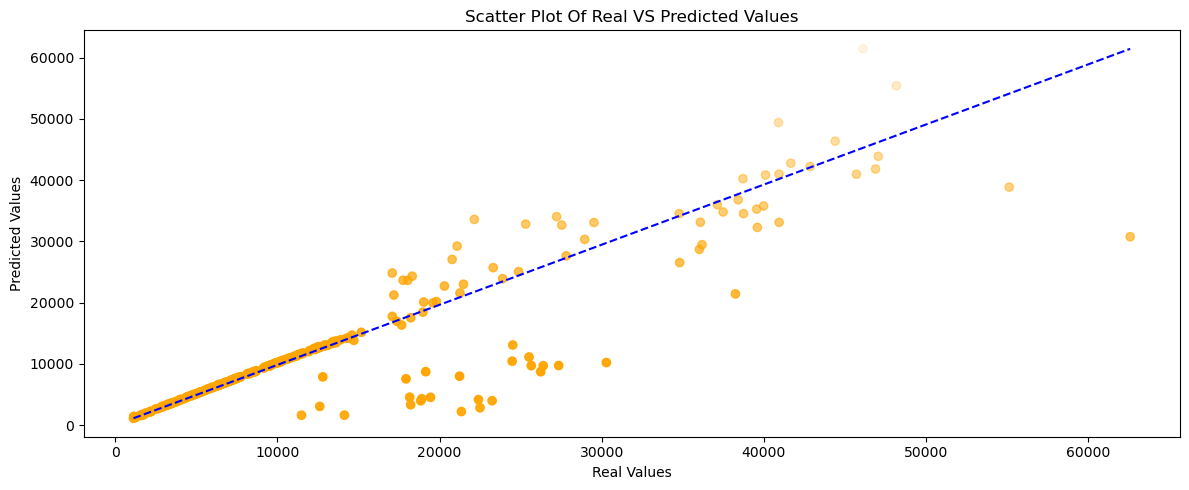

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
print("ORIGINAL DATASET: ")
print(data.head())

data_one_hot = pd.get_dummies(data)
print("\nCONVERTED DATASET: ")
print(data_one_hot.head())

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"].values # .values is used to get a 1-dimensional array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential([
    Dense(1000, activation='relu', input_shape=(11, )),
    Dense(500, activation='relu'),
    Dense(250, activation='relu'),
    Dense(1)
])

model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=64)

train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nTraining Loss (MAE) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MAE) on Test Data:", test_loss)

# MAE loss function plot on train and validation data
plt.figure(figsize=(12, 5))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training Loss (MAE)')
plt.plot(val_loss, label='Validation Loss (MAE)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

# Scatter Plot Of Real VS Predicted Values
plt.figure(figsize=(12, 5))
y_pred = model.predict(X_test)
distances = np.abs(y_test - y_pred) # Distance between real and predicted values
max_distance = np.max(distances) # For setting transparency
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Transparency which depends on the distance
    plt.scatter(y_test[i], y_pred[i], c='orange', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color = 'blue')
plt.title("Scatter Plot Of Real VS Predicted Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.tight_layout()
plt.show()